# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

In [33]:
#Above questions doesnt apply in my case because I'm using my labtop for this lab.

#Question 4: While training a DNN, we store mini batches in the GPU memory.

# Part 4: Load the data

Load the dataset from the prepared npy files


In [34]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')


# Remove the first 24 covariates
X = np.delete(X,np.s_[0:24],1)

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
    

The covariates have size (764136, 92).
The labels have size (764136, 1).


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

### Naive Classification performace = (each example class)/(total of examples)

In [35]:
import numpy as np
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

x_nan = np.isnan(X)
y_nan = np.isnan(Y)

# Print the number of NaNs (not a number) in the labels
print(len(y_nan[y_nan==True]))

# Print the number of NaNs in the covariates
print(len(x_nan[x_nan==True]))

0
0


# Part 6: Preprocessing

Lets do some simple preprocessing

In [36]:
import numpy as np


# Convert covariates to floats
x_f_orig = X.astype(float)
#print(x_f[0:10,0])
# Convert labels to ints
y_int = Y.astype(int)

# Remove mean of each covariate (column)
cov_mean = np.mean(x_f_orig,axis=0)
#print(cov_mean[0])
x_f_mean_rmv = (x_f_orig - cov_mean)
#print(remv_mean[0:10,0])
# Divide each covariate (column) by its standard deviation

#changed
stdv = np.std(x_f_orig, axis = 0)
x_f = x_f_mean_rmv/stdv

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
#print(np.mean(remv_mean))
#print(np.std(x_stdv))

#changed
X = X - np.mean(X,axis=0)

X = X / np.std(X,axis=0)

print(np.mean(X,axis=0))

print(np.std(X,axis=0))

[ 4.62142524e-18  3.18385513e-16 -1.84633842e-16 -2.48459723e-17
 -3.04697912e-16 -1.17921663e-15 -1.52348956e-16 -1.24043889e-15
  1.71526476e-15 -7.61372834e-17  7.85102969e-16  7.82015820e-18
  2.20377823e-18 -2.35441624e-17  4.64188225e-16  4.78842886e-16
  1.73921806e-16 -1.55644395e-15  8.74072379e-19 -6.54624420e-18
  1.74814476e-18 -1.63507327e-16  2.70702076e-16  8.86718533e-17
 -1.25799472e-15  2.18146149e-17  3.45909495e-18  7.12647948e-17
 -5.62047137e-16 -6.10362883e-16 -6.27100439e-17 -9.82606133e-16
 -2.17774203e-17  1.10095925e-17  4.20298633e-17  5.51967409e-17
  4.07503702e-16 -2.18629679e-16  6.54624420e-18 -1.99362892e-17
 -4.56749311e-17  7.29013559e-17 -1.24058767e-15 -1.48778277e-18
  1.33342531e-17  4.64188225e-16  7.99683241e-18  6.22916050e-17
 -1.62912214e-16 -4.94687772e-18  5.00638903e-17 -5.37535916e-16
 -6.45325778e-18 -1.16790948e-17  2.17216285e-17 -1.72954747e-17
 -7.98195458e-17  4.90075646e-16  2.99193116e-16 -1.90064249e-17
  4.81148949e-16  3.08714

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [37]:
# Your code
import sklearn as skl

from sklearn.model_selection import train_test_split

#help(train_test_split)

Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(x_f, y_int,train_size=0.70 ,test_size=0.30)

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

#changed
#print('Training Number of examples of Class 0 is:{} '.format(len(Xtrain[Xtrain==0])))
#print('Training Number of examples of Class 1 is:{} '.format(len(Xtrain[Xtrain==1])))
#print('Test Number of examples of Class 0 is:{} '.format(len(Xtemp[Xtemp==0])))
#print('Test Number of examples of Class 1 is:{} '.format(len(Xtemp[Xtemp==0])))


#changed
numClasses = 2
for i in range(numClasses):

    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

    print("Number of testing examples for class {} is {}" .format(i,np.sum(Ytemp == i)))




Xtrain has size (534895, 92).
Ytrain has size (534895, 1).
Xtemp has size (229241, 92).
Ytemp has size (229241, 1).
Number of training examples for class 0 is 85133
Number of testing examples for class 0 is 36487
Number of training examples for class 1 is 449762
Number of testing examples for class 1 is 192754


# Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not?

Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

### Answer
It is better to shuffle the data before spliting it into training and validation. 
If we do spliting without shuffling, we might get some data in training or validation which doesnt include all the classes.

In [38]:
from sklearn.utils import shuffle

import sklearn as skl

from sklearn.model_selection import train_test_split

# Randomly shuffle data, to get both classes in training and testing
#help(shuffle)

#y_shuf = shuffle(y_int, random_state=0)
#x_shuf = shuffle(x_f, random_state=0)

#changed
x_shuf, y_shuf = shuffle(x_f, y_int, random_state=0)

# Divide the data into training and validation/test again

Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(x_shuf, y_shuf,train_size=0.70 ,test_size=0.30)

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

#changed
print('Training Number of examples of Class 0 is:{} '.format(len(Ytrain[Ytrain==0])))
print('Training Number of examples of Class 1 is:{} '.format(len(Ytrain[Ytrain==1])))

print('Test Number of examples of Class 0 is:{} '.format(len(Ytemp[Ytemp==0])))
print('Test Number of examples of Class 1 is:{} '.format(len(Ytemp[Ytemp==0])))


Xtrain has size (534895, 92).
Ytrain has size (534895, 1).
Xtemp has size (229241, 92).
Ytemp has size (229241, 1).
Training Number of examples of Class 0 is:85031 
Training Number of examples of Class 1 is:449864 
Test Number of examples of Class 0 is:36589 
Test Number of examples of Class 1 is:36589 


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [39]:
from sklearn.model_selection import train_test_split

Xtest, Xval, Ytest, Yval = train_test_split(Xtemp, Ytemp,train_size=0.50 ,test_size=0.50)


print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114620, 92), (114621, 1) and (114620, 1)


# Part 10: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [40]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy as binCross

#help(keras.layers)
#help(keras.layers.normalization)

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    optimise = SGD(lr=learning_rate)
    if optimizer == 'adam':
        optimise = Adam(lr=learning_rate)
        
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    model.add(Dense(n_nodes, activation = act_fun, input_dim = input_shape))
    

    
    if(use_bn==True):
        model.add(BatchNormalization())
    if(use_dropout==True):
        model.add(Dropout(0.5))
    elif use_custom_dropout:
        model.add(myDropout(rate = 0.5))
        
    # Add first layer, requires input shape
    
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation = act_fun))
        if(use_bn==True):
            model.add(BatchNormalization())
        if(use_dropout==True):
            model.add(Dropout(0.5))
        elif use_custom_dropout:
            model.add(myDropout(rate = 0.5))


    
    # Final layer
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile model
    model.compile(optimizer = optimise,loss = binCross, metrics=['accuracy'])
    
    return model

In [41]:
# Lets define a help function for plotting the training results

# IMPORTANT NOTE
# The history unfortunately behaves a bit randomly for every user
# If the plots for accuracy and loss look mixed, change the order of
# val_loss, val_acc, loss, acc
# until the plots look as they "should"

import matplotlib.pyplot as plt
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [42]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape[1]

# Build the model
model1 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1)

# Train the model, provide training data and validation data
history1 = model1.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  batch_size = batch_size)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4025 - accuracy: 0.8410 - val_loss: 0.3760 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3507 - accuracy: 0.8410 - val_loss: 0.3234 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2972 - accuracy: 0.8410 - val_loss: 0.2715 - val_accuracy: 0.8405
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2526 - accuracy: 0.8483 - val_loss: 0.2354 - val_accuracy: 0.8561
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2248 - accuracy: 0.8701 - val_loss: 0.2147 - val_accuracy: 0.8871
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2092 - accuracy: 0.8935 - val_loss: 0.2030 - val_accuracy: 0.8983
Epoch 7/20
534895/534895 [==============================] - 

In [43]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Evaluate the model on the test data
score = model1.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 11us/step
Test loss: 0.1726
Test accuracy: 0.9077


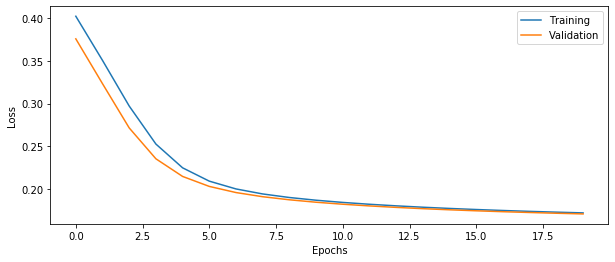

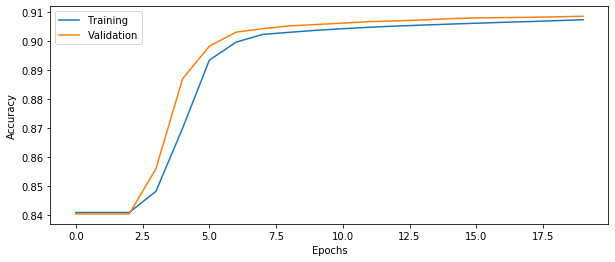

In [45]:
# Plot the history from the training run
plot_results(history1)

# Part 12: More questions

### Question 9: What happens if you add several Dense layers without specifying the activation function?

#### Answer:
Dense layers help to reduce the dimensions of the vector. If we dont use activation function with dense layer, then the behaviour of the dense layer will be a linear behaviour and a number of dense layers with linear activation can be reduced to a single dense layer.


### Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?
    
#### Answer: glorot_uniform is used as default intializer while the biased intialization is zero.
    
Reference link:
https://stackoverflow.com/questions/54011173/what-is-the-default-weight-initializer-in-keras
    

# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [46]:
from sklearn.utils import class_weight
# Calculate class weights
class_weight_balance =  class_weight.compute_class_weight('balanced',np.unique(Ytrain[:,0]),Ytrain[:,0])
#help(class_weight.compute_class_weight)

# Print the class weights
print(class_weight_balance)

[3.14529407 0.59450745]


### 2 layers, 20 nodes, class weights

In [47]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =  Xtrain.shape[1]

# Build and train model
model2 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1)

history2 = model2.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4277 - accuracy: 0.8410 - val_loss: 0.4020 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3803 - accuracy: 0.8410 - val_loss: 0.3569 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3313 - accuracy: 0.8410 - val_loss: 0.3047 - val_accuracy: 0.8405
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2812 - accuracy: 0.8411 - val_loss: 0.2588 - val_accuracy: 0.8410
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2431 - accuracy: 0.8512 - val_loss: 0.2288 - val_accuracy: 0.8589
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2202 - accuracy: 0.8700 - val_loss: 0.2119 - val_accuracy: 0.8861
Epoch 7/20
534895/534895 [==============================] - 

In [48]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                1860      
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 21        
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Evaluate model on test data
score = model2.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 11us/step
Test loss: 0.1748
Test accuracy: 0.9090


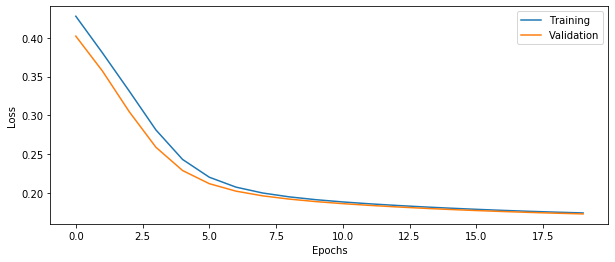

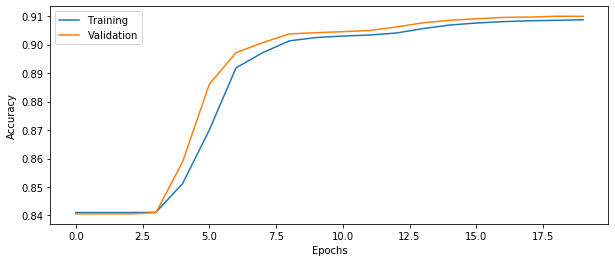

In [50]:
plot_results(history2)

# Part 14: More questions

#### Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Answer: Sometimes its not possible to store the whole dataset in the GPU that's why we prefer to use data in batches.

#### Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Answer: This question doesnt apply in my case, I'm using my own laptop.

#### Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Answer: 
time for one training epoch when the batch size is 100: 15 sec
time for one epoch when the batch size is 1,000: 4 sec
time for one epoch when the batch size is 10,000: 2 sec


#### Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

Answer: We can calculate the number of times weight are updated by: (data size/batch size)

times are the weights in the DNN updated in each training epoch if the batch size is 100: 534895/100 = 5348.95
times are the weights in the DNN updated in each training epoch if the batch size is 1,000: 534895/1000 = 534.895
times are the weights in the DNN updated in each training epoch if the batch size is 10,000: 534895/10000 = 53.4895


#### Question 15: What limits how large the batch size can be?

Answer: We decide the batch size on the basis of RAM and GPU memory.

#### Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Answer: Batch size directly affects the learning rate. With the large batch size we get more accurate results, because with large batch size we optimize loss simultaneously.

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.


# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

#### Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

Answer:
1. Network with 4 dense layers with 50 nodes: Trainable params: 12,351
2. Network with 2 dense layers with 20 nodes: Trainable params: 2,301

### 4 layers, 20 nodes, class weights

In [51]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape =  Xtrain.shape[1]

# Build and train model
model3 =  build_DNN(input_shape = input_shape,n_layers = 4,n_nodes = 50,learning_rate = 0.1)

history3 = model3.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size)


Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4403 - accuracy: 0.8410 - val_loss: 0.4385 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4376 - accuracy: 0.8410 - val_loss: 0.4383 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4373 - accuracy: 0.8410 - val_loss: 0.4380 - val_accuracy: 0.8405
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4371 - accuracy: 0.8410 - val_loss: 0.4377 - val_accuracy: 0.8405
Epoch 5/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4368 - accuracy: 0.8410 - val_loss: 0.4374 - val_accuracy: 0.8405
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4365 - accuracy: 0.8410 - val_loss: 0.4371 - val_accuracy: 0.8405
Epoch 7/20
534895/534895 [==============================] - 

In [52]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                4650      
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_32 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 51        
Total params: 12,351
Trainable params: 12,351
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Evaluate model on test data
score = model3.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 2s 13us/step
Test loss: 0.4172
Test accuracy: 0.8402


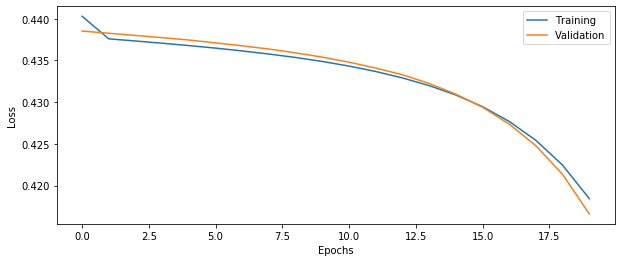

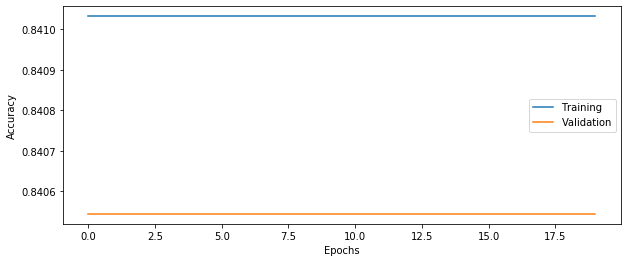

In [54]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [55]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model4 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 50,learning_rate = 0.1)  

history4 = model4.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4323 - accuracy: 0.8280 - val_loss: 0.3928 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3599 - accuracy: 0.8410 - val_loss: 0.3238 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2905 - accuracy: 0.8442 - val_loss: 0.2590 - val_accuracy: 0.8526
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2392 - accuracy: 0.8575 - val_loss: 0.2220 - val_accuracy: 0.8719
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2134 - accuracy: 0.8864 - val_loss: 0.2050 - val_accuracy: 0.8962
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2012 - accuracy: 0.8981 - val_loss: 0.1963 - val_accuracy: 0.9019
Epoch 7/20
534895/534895 [==============================] - 

In [56]:
# Evaluate model on test data
score = model4.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 12us/step
Test loss: 0.1724
Test accuracy: 0.9090


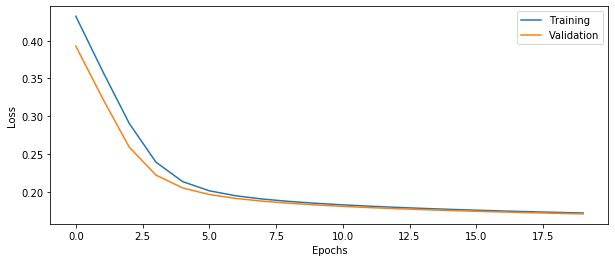

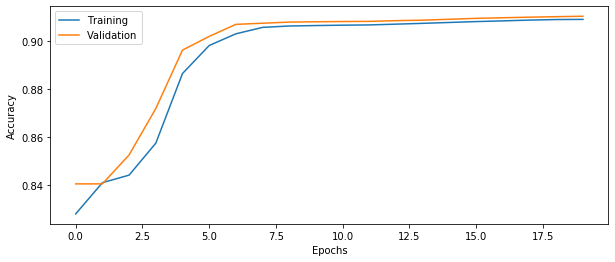

In [57]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [58]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model5 = build_DNN(input_shape = input_shape,n_layers = 4,n_nodes = 50,learning_rate = 0.1)

history5 = model5.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4416 - accuracy: 0.8410 - val_loss: 0.4378 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4368 - accuracy: 0.8410 - val_loss: 0.4374 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4364 - accuracy: 0.8410 - val_loss: 0.4370 - val_accuracy: 0.8405
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4360 - accuracy: 0.8410 - val_loss: 0.4365 - val_accuracy: 0.8405
Epoch 5/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4355 - accuracy: 0.8410 - val_loss: 0.4360 - val_accuracy: 0.8405
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4350 - accuracy: 0.8410 - val_loss: 0.4355 - val_accuracy: 0.8405
Epoch 7/20
534895/534895 [==============================] - 

In [59]:
model5.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 50)                4650      
_________________________________________________________________
dense_38 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_39 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_40 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 51        
Total params: 12,351
Trainable params: 12,351
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Evaluate model on test data
score = model5.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 2s 14us/step
Test loss: 0.3504
Test accuracy: 0.8402


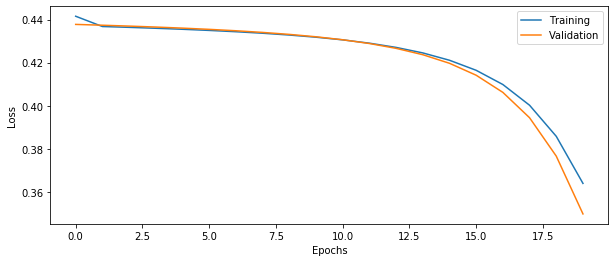

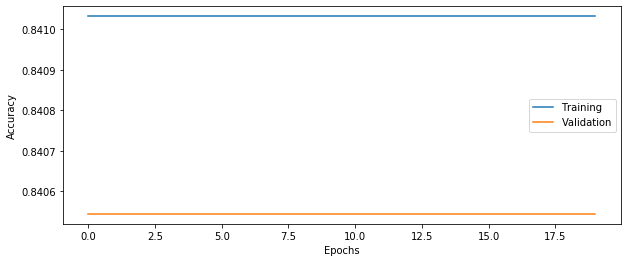

In [61]:
plot_results(history5)

# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

#### Question 18: Why is batch normalization important when training deep networks?

Answer: Batch normalization is a technique for improving the speed, performance, and stability of the deep neural network. It can help to reduce the problem of internal covariate shift.

Refernce link:
https://en.wikipedia.org/wiki/Batch_normalization

### 2 layers, 20 nodes, class weights, batch normalization

In [62]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model6 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1, use_bn=True)

history6 = model6.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 3us/step - loss: 0.2891 - accuracy: 0.8872 - val_loss: 0.4238 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1857 - accuracy: 0.9090 - val_loss: 0.3578 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1727 - accuracy: 0.9112 - val_loss: 0.3390 - val_accuracy: 0.8405
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1669 - accuracy: 0.9127 - val_loss: 0.2999 - val_accuracy: 0.8405
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1634 - accuracy: 0.9138 - val_loss: 0.2598 - val_accuracy: 0.8406
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1610 - accuracy: 0.9146 - val_loss: 0.2159 - val_accuracy: 0.8464
Epoch 7/20
534895/534895 [==============================] - 

In [63]:
# Evaluate model on test data
score = model6.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 2s 16us/step
Test loss: 0.1481
Test accuracy: 0.9192


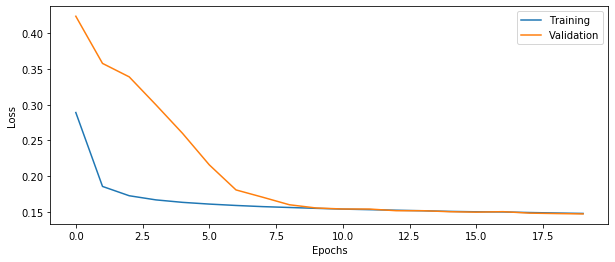

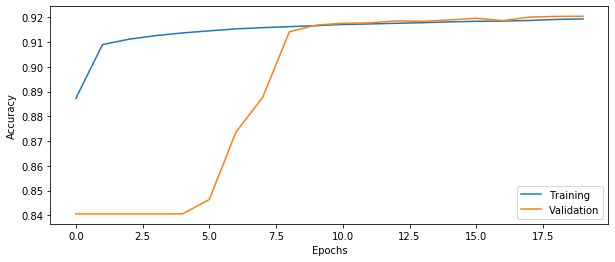

In [64]:
plot_results(history6)

# Part 17: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [65]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model7 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1 ,act_fun = 'relu')

history7 = model7.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2674 - accuracy: 0.8746 - val_loss: 0.1952 - val_accuracy: 0.8989
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1892 - accuracy: 0.9016 - val_loss: 0.1836 - val_accuracy: 0.9054
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1818 - accuracy: 0.9063 - val_loss: 0.1785 - val_accuracy: 0.9087
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1773 - accuracy: 0.9091 - val_loss: 0.1746 - val_accuracy: 0.9109
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1738 - accuracy: 0.9110 - val_loss: 0.1715 - val_accuracy: 0.9125
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1709 - accuracy: 0.9123 - val_loss: 0.1689 - val_accuracy: 0.9132
Epoch 7/20
534895/534895 [==============================] - 

In [66]:
# Evaluate model on test data
score = model7.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 11us/step
Test loss: 0.1581
Test accuracy: 0.9164


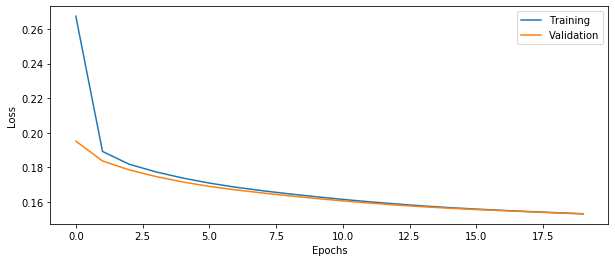

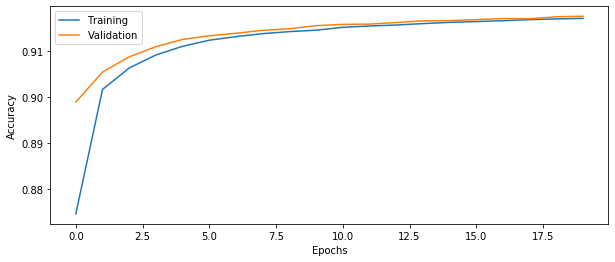

In [67]:
plot_results(history7)

# Part 18: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [68]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model8 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1,use_bn=False, act_fun = 'sigmoid',optimizer='adam')

history8 = model8.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2116 - accuracy: 0.8873 - val_loss: 0.1616 - val_accuracy: 0.9144
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1570 - accuracy: 0.9166 - val_loss: 0.1525 - val_accuracy: 0.9196
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1487 - accuracy: 0.9203 - val_loss: 0.1451 - val_accuracy: 0.9214
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1429 - accuracy: 0.9222 - val_loss: 0.1399 - val_accuracy: 0.9246
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1397 - accuracy: 0.9241 - val_loss: 0.1376 - val_accuracy: 0.9258
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1344 - accuracy: 0.9280 - val_loss: 0.1301 - val_accuracy: 0.9323
Epoch 7/20
534895/534895 [==============================] - 

In [69]:
# Evaluate model on test data
score = model8.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 13us/step
Test loss: 0.1166
Test accuracy: 0.9380


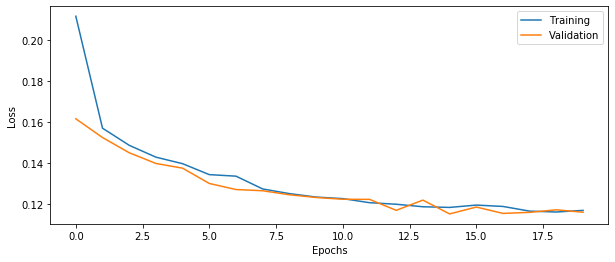

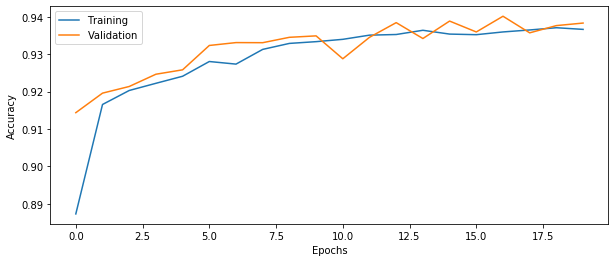

In [70]:
plot_results(history8)

# Part 19: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer), with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/layers/core/ for how the Dropout layer works.

---

#### Question 19: How does the validation accuracy change when adding dropout?

Answer: validation accuracy: 0.9007

#### Question 20: How does the test accuracy change when adding dropout?

Answer: Test accuracy: 0.9023

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [71]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1]

# Build and train model
model9 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1,use_bn=False, 
                   act_fun = 'sigmoid',
                   optimizer='sgd',
                   use_dropout = True
                  )

history9 = model9.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 3us/step - loss: 0.4746 - accuracy: 0.8130 - val_loss: 0.3980 - val_accuracy: 0.8405
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.4185 - accuracy: 0.8399 - val_loss: 0.3676 - val_accuracy: 0.8405
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3894 - accuracy: 0.8409 - val_loss: 0.3359 - val_accuracy: 0.8405
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3626 - accuracy: 0.8419 - val_loss: 0.3035 - val_accuracy: 0.8405
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3360 - accuracy: 0.8449 - val_loss: 0.2735 - val_accuracy: 0.8405
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.3143 - accuracy: 0.8483 - val_loss: 0.2491 - val_accuracy: 0.8405
Epoch 7/20
534895/534895 [==============================] - 

In [72]:
# Evaluate model on test data
score = model9.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 2s 14us/step
Test loss: 0.1870
Test accuracy: 0.8989


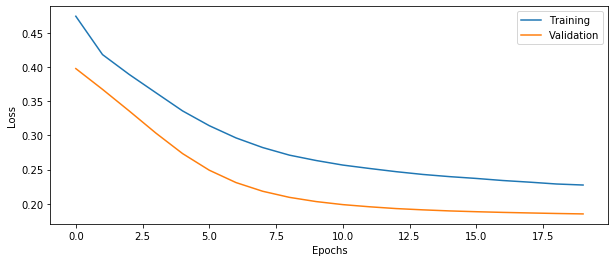

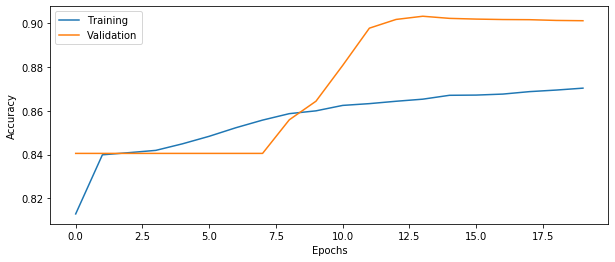

In [73]:
plot_results(history9)

# Part 20: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

#### Question 21: How high classification accuracy can you achieve for the test data? What is your best configuration?

1. Accuracy and Loss for the best configuration:
Test loss: 0.1193
Test accuracy: 0.9354

2. Best configuration with the lowest loss and high accuracy:
batch_size = 10000
epochs = 20
n_layers = 2,
n_nodes = 20,
learning_rate = 0.1,
use_bn=False, 
act_fun = 'sigmoid',
optimizer='adam'


In [74]:
# Find your best configuration for the DNN
#input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1, use_bn=Tru
#By comparing above results, best configuration with the less loss and high accuracy is for the configuration with 2 layes,20 nodes,
#use batch normalization, and learning rate 0.1 

# Build and train DNN
model10 =  build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1,
                     use_bn=False, act_fun = 'sigmoid',optimizer='adam') 

history10 = model10.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)


Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2114 - accuracy: 0.8853 - val_loss: 0.1657 - val_accuracy: 0.9140
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1588 - accuracy: 0.9162 - val_loss: 0.1528 - val_accuracy: 0.9191
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1490 - accuracy: 0.9198 - val_loss: 0.1453 - val_accuracy: 0.9213
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1438 - accuracy: 0.9210 - val_loss: 0.1448 - val_accuracy: 0.9197
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1407 - accuracy: 0.9227 - val_loss: 0.1406 - val_accuracy: 0.9241
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1381 - accuracy: 0.9249 - val_loss: 0.1355 - val_accuracy: 0.9232
Epoch 7/20
534895/534895 [==============================] - 

In [75]:
# Evaluate DNN on test data
score = model10.evaluate(x = Xtest, y = Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 12us/step
Test loss: 0.1208
Test accuracy: 0.9362


# Part 21: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN.

Run the same test data through the trained network 100 times, with dropout turned on. 

#### Question 22: What is the mean and the standard deviation of the test accuracy?
Answer: please check in the blow box.

In [76]:
import keras
import keras.backend as K

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,seed=self.seed)
            
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [77]:
# Your best training parameters

# Best config- model8: Test loss: 0.1186, Test accuracy: 0.9379


# Build and train model
model11 = build_DNN(input_shape = input_shape,n_layers = 2,
                    n_nodes = 20,learning_rate = 0.1,
                    use_bn=False, act_fun = 'sigmoid',optimizer='adam',
                    use_custom_dropout=True
                   )

history11 = model11.fit(x = Xtrain, y = Ytrain, epochs = epochs, validation_data = (Xval,Yval),  
                      batch_size = batch_size,
                      class_weight = class_weight_balance)


Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.2409 - accuracy: 0.8654 - val_loss: 0.1796 - val_accuracy: 0.9009
Epoch 2/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1729 - accuracy: 0.9068 - val_loss: 0.1677 - val_accuracy: 0.9119
Epoch 3/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1653 - accuracy: 0.9127 - val_loss: 0.1628 - val_accuracy: 0.9145
Epoch 4/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1627 - accuracy: 0.9141 - val_loss: 0.1616 - val_accuracy: 0.9152
Epoch 5/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1622 - accuracy: 0.9141 - val_loss: 0.1616 - val_accuracy: 0.9152
Epoch 6/20
534895/534895 [==============================] - 1s 2us/step - loss: 0.1612 - accuracy: 0.9149 - val_loss: 0.1607 - val_accuracy: 0.9154
Epoch 7/20
534895/534895 [==============================] - 

In [78]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(x = Xtest, y = Ytest)

print('Test accuracy: %.4f' % score[1])


114620/114620 [==============================] - 2s 17us/step
Test accuracy: 0.9171


In [79]:
# Run the testing 100 times, and save the accuracies in an array

acc_eval = [0] * 100

for i in range(100):
    score = model11.evaluate(x = Xtest, y = Ytest)
    acc_eval[i] = score[1]

# Calculate and print mean and std of accuracies
               
print('Accuracy mean: %f' % np.mean(acc_eval)) 
print('Accuracy standard deviation: %f' % np.std(acc_eval))

114620/114620 [==============================] - 2s 14us/step
Accuracy mean: 0.917158
Accuracy standard deviation: 0.000158


# Part 22: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 23: What is the mean and the standard deviation of the test accuracy?

Answer: Means and standard deviation for test accuracy are 0.8408398628234863 and 1.02200676199688e-06 respectively.

Question 24: What is the main advantage of dropout compared to CV for estimating test uncertainty?

Answer: Training speed with the dropout is faster as compare to CV. 


In [80]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define 10-fold cross validation
cross_val = StratifiedKFold(n_splits=10, shuffle=True)
acc_list = []
# Loop over cross validation folds
for tr_i, te_i in cross_val.split(x_f, y_int):   
    # Calculate class weights for current split
    class_weight_balance =  class_weight.compute_class_weight('balanced',np.unique(Ytrain[:,0]),Ytrain[:,0])

    # Rebuild the DNN model, to not continue training on the previously trained model
    # Build and train model
    model12 = build_DNN(input_shape = input_shape,n_layers = 2,n_nodes = 20,learning_rate = 0.1, use_bn=True)
    
    # Fit the model with training set and class weights for this fold
    #history12 = model12.fit(x = x_f[te_i], y = y_int[te_i], epochs = epochs, validation_data = (x_f[te_i],y_int[te_i]),  
    #                  batch_size = batch_size,
    #                  class_weight = class_weight_balance)
    
    history12 = model12.fit(x = x_f[tr_i], y = y_int[tr_i], epochs = epochs,batch_size = batch_size,class_weight = class_weight_balance)

    # Evaluate the model using the test set for this fold
    score = model12.evaluate(x = x_f[te_i], y = y_int[te_i])
    # Save the test accuracy in an array
    acc_list.append(score[1])
# Calculate and print mean and std of accuracies

print(acc_list)

Epoch 1/20
687722/687722 [==============================] - 2s 2us/step - loss: 0.2696 - accuracy: 0.9047
Epoch 2/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1805 - accuracy: 0.9111
Epoch 3/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1685 - accuracy: 0.9134
Epoch 4/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1632 - accuracy: 0.9149
Epoch 5/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1599 - accuracy: 0.9159
Epoch 6/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1578 - accuracy: 0.9166
Epoch 7/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1560 - accuracy: 0.9173
Epoch 8/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1546 - accuracy: 0.9177
Epoch 9/20
687722/687722 [==============================] - 1s 2us/step - loss: 0.1533 - accuracy: 0.9183
Epoch 10/20
687722/687722 [===================

In [81]:
print(np.mean(acc_list))
print(np.std(acc_list))

0.9202210247516632
0.003972638180471173


# Part 23: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 25: How would you change the DNN in order to use it for regression instead?

Answer:
We can use regression DNN by considering some factores, e.g. by not using any activation function at the end and also by usinng MSE as a loss function.

## Report

Send in this jupyter notebook, with answers to all questions.